## Birds Songs Dataset EDA

### Import modules

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn_image as snsi
import matplotlib.pyplot as plt 
from data_models.dataset2 import BirdDataset 
from data_models.dataset import BirdDataset as SpectrogramDS


### Cargar Datos

In [2]:
dataset = BirdDataset(data_path='../data/')

In [10]:
metadata = pd.DataFrame(dataset.metadata)
metadata

,species,audio_name,audio_offset,spectrograms_name,species_encoded
0,Acrocephalus arundinaceus,XC417157.mp3,2.168366,XC417157_0.npy,0
1,Acrocephalus arundinaceus,XC417157.mp3,19.289143,XC417157_1.npy,0
2,Acrocephalus arundinaceus,XC417158.mp3,3.496018,XC417158_0.npy,0
3,Acrocephalus arundinaceus,XC417158.mp3,9.991159,XC417158_1.npy,0
4,Acrocephalus arundinaceus,XC417158.mp3,18.651346,XC417158_2.npy,0
...,...,...,...,...,...
5791,Tachybaptus ruficollis,XC520116.mp3,26.242164,XC520116_1.npy,19
5792,Tachybaptus ruficollis,XC520116.mp3,40.288175,XC520116_2.npy,19
5793,Tachybaptus ruficollis,XC97974.mp3,1.337156,XC97974_0.npy,19
5794,Tachybaptus ruficollis,XC97974.mp3,6.556056,XC97974_1.npy,19


### Histograma de clases

In [14]:
metadata.species.value_counts()

Ixobrychus minutus           559
Dendrocopos minor            494
Acrocephalus arundinaceus    453
Botaurus stellaris           436
Alcedo atthis                418
Motacilla flava              400
Charadrius alexandrinus      375
Fulica atra                  372
Circus aeruginosus           308
Himantopus himantopus        277
Coracias garrulus            267
Gallinula chloropus          262
Acrocephalus melanopogon     221
Ardea purpurea               207
Porphyrio porphyrio          186
Tachybaptus ruficollis       153
Ciconia ciconia              121
Acrocephalus scirpaceus      121
Anas strepera                 96
Anas platyrhynchos            70
Name: species, dtype: int64

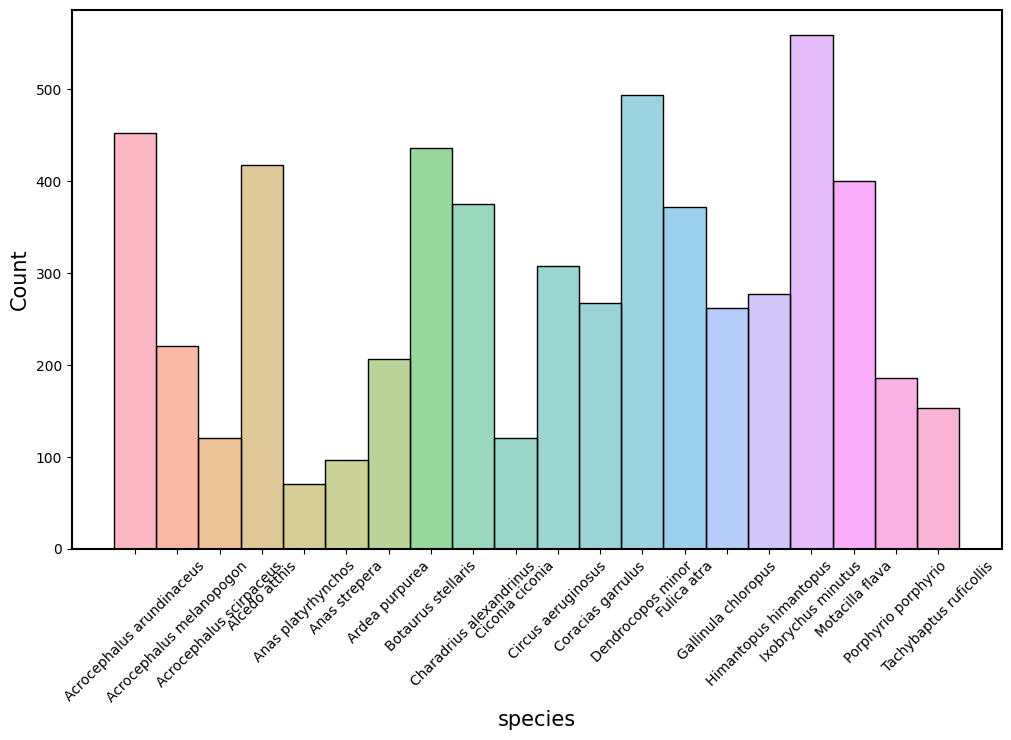

In [13]:
f, ax = plt.subplots(1, figsize = (12,7))
sns.histplot(data = metadata, x = 'species', hue = 'species', legend=False, ax = ax)
plt.xticks(rotation=45)
plt.show()

Con el histograma de distribución de las clases en el dataset, podemos apreciar cómo no hay una clase que predomine mucho que las demás, así que no diria que nos encontramos con un caso de unbalanced dataset.

La clase con menos datos es Anas platyrhynchos con solo 70 muestras y la clase más poblada es Ixobrychus minutus con ~550 muestras.

Aunque no tendremos un problema de dataset no balanceado, creo que el modelo deberà ser complejo debido a que hay 20 clases, y aunque quizá pueda distinguir bien las muestras de las classes mayoritarias, se deberan ponderar las clases con menos muestrar para que no las clasifique mal.

### Normalización

A continuación se hará el estudio de los espectogramas, su media y el std de los spectogramas para la posterior normalización.

In [15]:
spectrograms = SpectrogramDS(data_path='../data/')

In [21]:
spectrograms[0][0].shape

(224, 224)

Podemos apreciar cómo se trata de imagenes de 224x224, con un sólo canal, indicando que se trata de imagenes en blanco y negro.

Ejemplo antes de la normalización

No. of Obs. : 50176
Min. Value : -80.0
Max. Value : -9.5367431640625e-07
Mean : -26.04367446899414
Variance : 74.70713160189337
Skewness : -0.6485159460338159


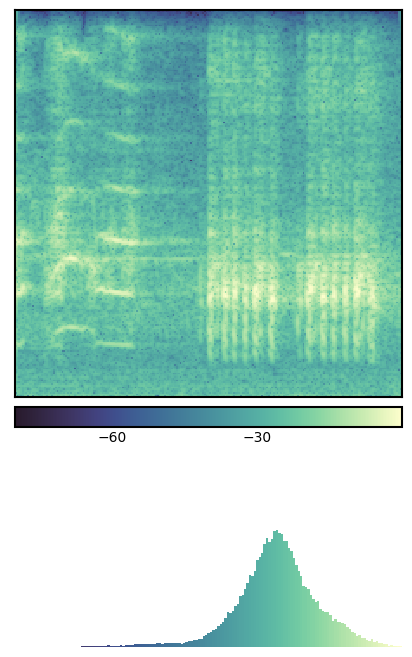

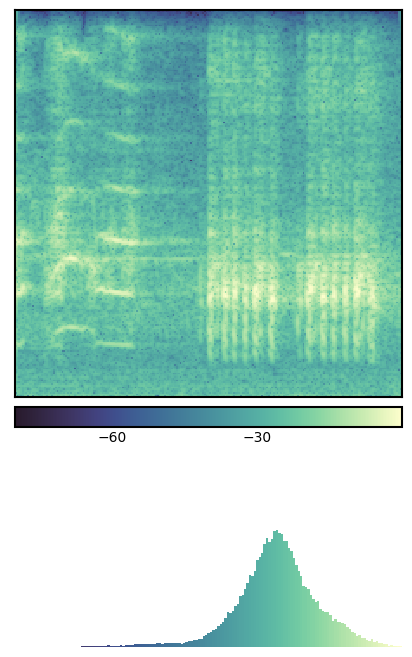

In [22]:
snsi.imghist(spectrograms[0][0], orientation = 'h', describe=True)

Calcular media y std de todo el dataset

In [23]:
spectrogram = []
labels = []
for idx in range(len(spectrograms)):
    tmp = spectrograms[idx]
    spectrogram.append(tmp[0])
    labels.append(tmp[1])

spectrogram = np.array(spectrogram)
labels = np.array(labels)

#### Medidas generales

In [57]:
mean, std = spectrogram.mean(), spectrogram.std()
mean,std

(-28.325325, 9.891574)

Podemos ver que los spectrogramas del dataset tienen una media de -28.32 y una std de 9.89. Son los valores que se usarán para la posterior normalización.

#### Medidas por especie

In [48]:
means = spectrogram.mean(axis = (1,2))
stds = spectrogram.std(axis = (1,2))

In [50]:
medidas = pd.DataFrame( {'label':labels, 'mean':means, 'std':stds})

In [51]:
medidas

,label,mean,std
0,0,-26.043674,8.643243
1,0,-34.592648,13.607533
2,9,-29.883331,15.062423
3,0,-28.060373,8.908616
4,2,-28.136312,8.669170
...,...,...,...
13919,12,-32.277359,10.099798
13920,15,-29.002029,9.469209
13921,3,-36.345848,8.575438
13922,2,-33.489571,9.995082


Media y desviación estandard por especie

In [53]:
mgrp = medidas.groupby('label',as_index=False).mean()
mgrp

,label,mean,std
0,0,-29.210142,8.837496
1,1,-27.222069,8.544268
2,2,-28.149708,9.027303
3,3,-31.775229,7.668126
4,4,-25.545906,8.275201
5,5,-26.265110,10.352344
6,6,-24.317860,9.845374
7,7,-36.803822,8.673697
8,8,-24.421961,7.059633
9,9,-26.376835,9.629447


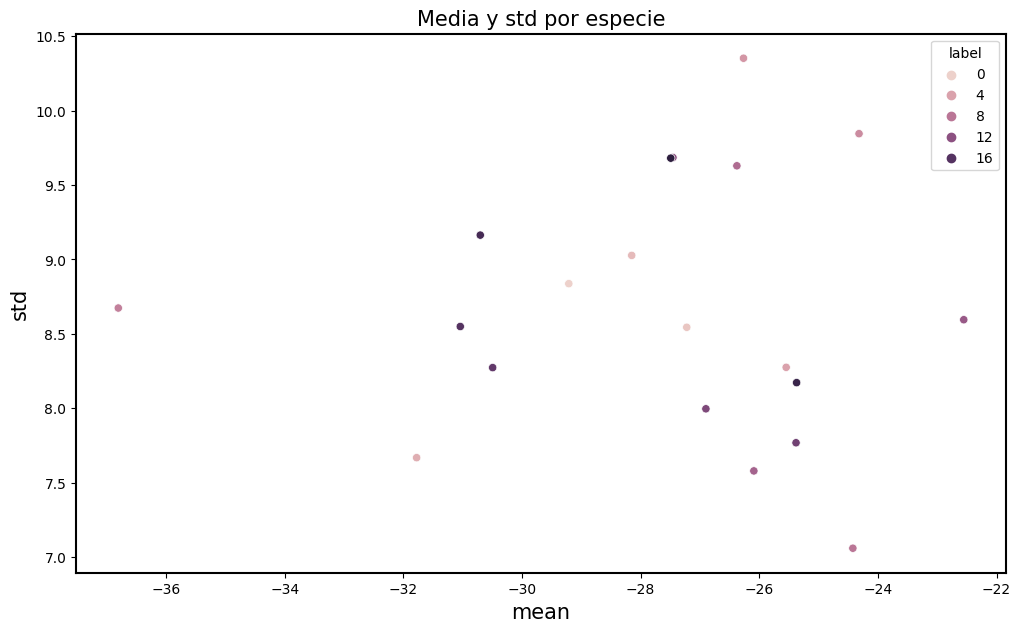

In [56]:
f, ax = plt.subplots(1, figsize = (12,7))
sns.scatterplot(data=mgrp, x = 'mean',y='std', hue = 'label', ax = ax, legend=True)
plt.title('Media y std por especie')
plt.show()

Podemos apreciar viendo el gràfico que hay diferencias entre las medias y stds entre las especias, aunque no muy significativas.

#### Histograma posterior a normalización

In [58]:
spectrogram_norm = (spectrogram - mean) / std

No. of Obs. : 50176
Min. Value : -5.2241106033325195
Max. Value : 2.8635811805725098
Mean : 0.2306661456823349
Variance : 0.7635390342784629
Skewness : -0.6485162063111366


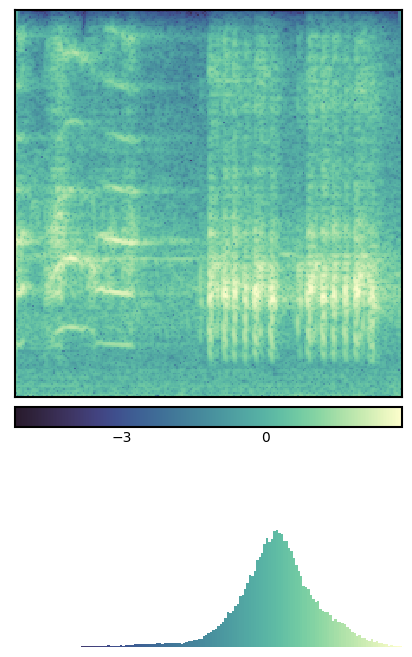

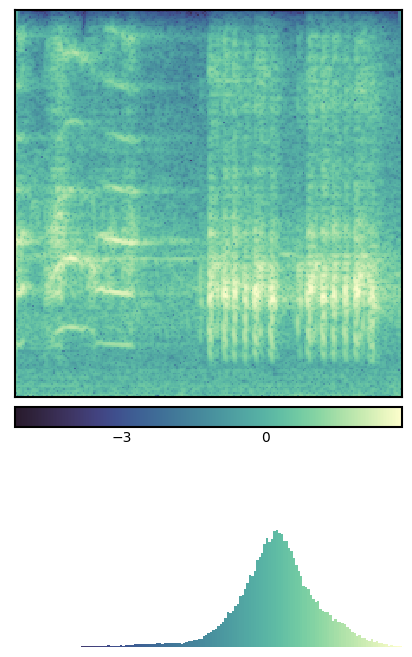

In [59]:
snsi.imghist(spectrogram_norm[0], orientation = 'h', describe=True)